# Reproducing Results From ICON Paper

https://dl.acm.org/citation.cfm?id=3286065

*CS 514: Computer Networks and Distributed Systems*

*Michael Zhang and Blaire Zhang*


### Import graph from gml

In [11]:
import networkx as nx
import queue
import random
import matplotlib.pyplot as plt
import numpy as np

graph = nx.read_gml('graphs/interconnect.gml', label='id')
#graph = nx.read_gml('graphs/condensed.gml', label='id')
#graph = nx.read_gml('graphs/condensed_west_europe.gml', label='id')

### Create the tree data structure

In [12]:
class TreeNode: 
    def __init__(self, data): 
        self.data = data 
        self.left = None
        self.right = None

In [13]:
def find_parent(root, val_to_find, dst=0):
    return find_parent_helper(root, val_to_find, dst)

def find_parent_helper(node, val, parent):
    if node == None:
        return None
    
    if node.data == val:
        return parent
    
    l = find_parent_helper(node.left, val, node.data)
    r = find_parent_helper(node.right, val, node.data)
    if not l and not r: return None
    if not l: return r
    if not r: return l
    return

### Methods to count messages

In [19]:
def num_neighbors(i):
    tmp = []
    for b in graph.neighbors(i):
        tmp.append(b)
    return len(tmp)

def get_messages(icon_num=100, dst=372):
    g_tree = nx.bfs_tree(graph, dst)
    indices = sorted(random.sample(range(0, len(graph.nodes)), icon_num))
    icons = []
    for i in indices:
        icons.append(list(g_tree)[i])

    isPath = True
    while True:
        for i in range(len(icons)):    
            if not nx.has_path(graph, icons[i], dst):
                icons[i] = random.sample(range(0, len(graph.nodes)), 1)[0]
        for i in icons:    
            isPath = isPath & nx.has_path(graph, i, dst)
        if isPath:
            break
    messages = 0
    decentralized = 0
    
    for i in icons:
        #centralized messages
        messages += ( len(nx.dijkstra_path(graph, i, dst)) - 1 )
        
        #decentralized
        closest = list(nx.bfs_tree(graph, i))
        closest.pop(0)
        tmp = 0
        for j in closest:
            if j in icons:
                #print('found', len(nx.dijkstra_path(graph, i, j)))
                tmp += len(nx.dijkstra_path(graph, i, j))
                break
        if tmp == 0: print("didn't find")
        decentralized += tmp
    avg = decentralized / icon_num
    print('avg', avg)
    #print(decentralized)
    return messages, decentralized, avg

In [20]:
def num_neighbors(i):
    tmp = []
    for b in graph.neighbors(i):
        tmp.append(b)
    return len(tmp)

def get_messages_tree(icon_num=100, dst=372):
    g_tree = nx.bfs_tree(graph, dst)
    indices = sorted(random.sample(range(0, len(graph.nodes)), icon_num))
    icons = []
    for i in indices:
        icons.append(list(g_tree)[i])

    # convert list into queue
    q_icons = queue.Queue()
    [q_icons.put(i) for i in icons]
    
    # create tree
    q = queue.Queue()
    first = TreeNode(q_icons.get())
    q.put(first)

    while not q_icons.empty():
        curr = q.get()
        l = q_icons.get()
        if not q_icons.empty():
            r = q_icons.get()
        else:
            r = None
        left = TreeNode(l)
        right = TreeNode(r)
        curr.left = left
        curr.right = right
        q.put(left)
        q.put(right)
    
    isPath = True
    while True:
        for i in range(len(icons)):    
            if not nx.has_path(graph, icons[i], dst):
                icons[i] = random.sample(range(0, len(graph.nodes)), 1)[0]
        for i in icons:    
            isPath = isPath & nx.has_path(graph, i, dst)
        if isPath:
            break
    messages = 0
    decentralized = 0
    
    for i in icons:
        #centralized messages
        messages += ( len(nx.dijkstra_path(graph, i, dst)) - 1 )
        
        #decentralized
        parent = find_parent(first, i, dst)
        decentralized += len(nx.dijkstra_path(graph, i, parent))
    
    avg = decentralized / icon_num
    #print('avg', avg)
    return messages, decentralized, avg

### Parameters
- `dst`: the index of the origin vertex
- `freq`: number of trials to do and average per container #

In [21]:
dst = random.sample(range(0, len(graph.nodes)), 1)[0]
#dst = 971
freq = 1

In [22]:
# number of containers
x = list(range(100, 701, 20))

# number of messages
y1 = []
y2 = []

y3 = []

for i in x:
    tmpsum = 0
    tmpsum_dec = 0
    tmpsum_avg = 0
    for j in range(freq):
        msg, dec, avg = get_messages(i, dst)
        tmpsum += msg
        tmpsum_dec += dec
        tmpsum_avg += avg
    #print(tmpsum / freq, tmpsum_dec / freq)
    y1.append(tmpsum / freq)
    y2.append(tmpsum_dec / freq)
    y3.append(tmpsum_avg / freq)

avg 3.94
avg 3.308333333333333
avg 3.1785714285714284
avg 3.15625
avg 3.0
avg 3.095
avg 2.840909090909091
avg 2.8875
avg 2.7807692307692307
avg 2.85
avg 2.6466666666666665
avg 2.671875
avg 2.7058823529411766
avg 2.6
avg 2.528947368421053
avg 2.5375
avg 2.466666666666667
avg 2.4681818181818183
avg 2.4152173913043478
avg 2.4520833333333334
avg 2.478
avg 2.4346153846153844
avg 2.4518518518518517
avg 2.3464285714285715
avg 2.320689655172414
avg 2.2983333333333333
avg 2.3403225806451613
avg 2.21875
avg 2.253030303030303
avg 2.222058823529412
avg 2.2085714285714286


### Plots

#### Reproducing Figure 4 from paper

Origin:  1139


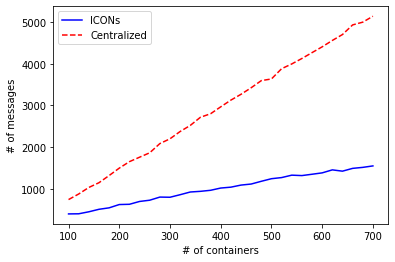

In [23]:
plt.plot(x, y2, 'b', label="ICONs")
plt.plot(x, y1, 'r--', label="Centralized")
plt.yscale('linear')
plt.xlabel("# of containers")
plt.ylabel("# of messages")
plt.legend(loc="upper left")
print("Origin: ", dst)

#### Isolated plot of messages vs. containers for decentralized ICONs

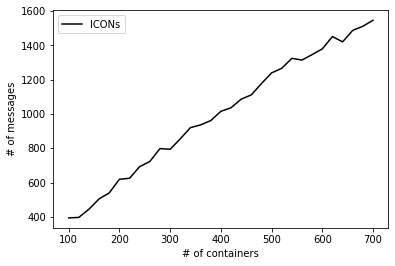

In [24]:
plt.plot(x, y2, 'k', label="ICONs")
plt.xlabel("# of containers")
plt.ylabel("# of messages")
plt.legend(loc="upper left")
#plt.yscale('log')

#### Plot showing trend of average messages per ICON

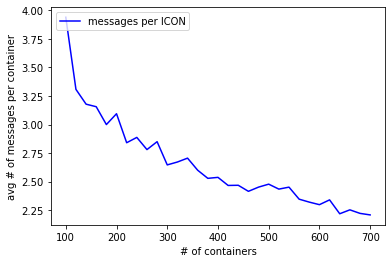

In [25]:
#print(np.array(x) * np.array(y3))
plt.plot(x, y3, 'b', label="messages per ICON")
plt.xlabel("# of containers")
plt.ylabel("avg # of messages per container")
plt.legend(loc="upper left")

#### Alternate method using binary tree parent
- Create overlay of ICONs that are joined together using a binary tree

In [28]:
# number of containers
x = list(range(100, 701, 20))

# number of messages
y1 = []
y2 = []

y3 = []

for i in x:
    tmpsum = 0
    tmpsum_dec = 0
    tmpsum_avg = 0
    for j in range(freq):
        msg, dec, avg = get_messages_tree(i, dst)
        tmpsum += msg
        tmpsum_dec += dec
        tmpsum_avg += avg
    #print(tmpsum / freq, tmpsum_dec / freq)
    y1.append(tmpsum / freq)
    y2.append(tmpsum_dec / freq)
    y3.append(tmpsum_avg / freq)

avg 9.19
avg 8.658333333333333
avg 9.107142857142858
avg 23.4
avg 8.205555555555556
avg 8.555
avg 8.936363636363636
avg 8.729166666666666
avg 9.223076923076922
avg 8.621428571428572
avg 16.466666666666665
avg 16.1125
avg 8.91470588235294
avg 8.872222222222222
avg 8.673684210526316
avg 14.485
avg 13.90952380952381
avg 8.847727272727273
avg 13.58695652173913
avg 8.877083333333333
avg 8.808
avg 13.392307692307693
avg 8.670370370370371
avg 8.848214285714286
avg 12.843103448275862
avg 12.595
avg 8.73225806451613
avg 8.7875
avg 8.818181818181818
avg 11.976470588235294
avg 12.255714285714285


Origin:  1139


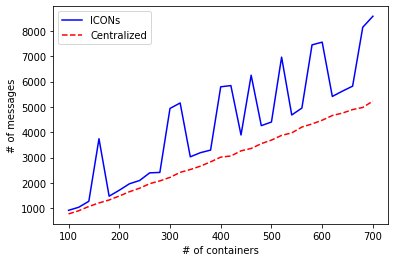

In [29]:
plt.plot(x, y2, 'b', label="ICONs")
plt.plot(x, y1, 'r--', label="Centralized")
plt.yscale('linear')
plt.xlabel("# of containers")
plt.ylabel("# of messages")
plt.legend(loc="upper left")
print("Origin: ", dst)